# Predicting Continuous Target Variables with Regression Analysis

회귀 모델은 타겟 변수가 연속적일때 사용한다. 주로 변수들 간의 관계, 트렌드 평가, 혹은 예측을 하는 곳에도 사용된다. 이 챕터에서는 회귀 모델의 중요 개념을 설명할 것이다.

- 데이터 시각화, 탐구
- 선형 회귀모델을 쓰기 위한 다른 접근 방법들
- outliers 처리에 좋은 회귀모델
- 회귀모델 평가, 문제 진단
- nonlinear 데이터에 회귀모델 적용


## Introducing a simple linear regression model

회귀분석의 목적은 단일 변수(독립 변수)와 연속적 값을 가진 목표변수 y와의 관계를 찾는 것이다. 변수가 하나인 선형 모델은 다음과 같이 정의된다.

<img src="ch10_1.png" alt="Drawing" style="width: 300px;"/>

우리의 목적은 이 linear equation에 x와 y간의 적절한 관계를 잘 설명하도록 w를 학습시키는 것이다. 

<img src="ch10_2.png" alt="Drawing" style="width: 700px;"/>

가장 잘 fitting하는 선은 **regression line**이라고 불리며, 회귀선과 각 샘플간의 수직선은  **offsets**혹은 **residuals**라고 불린다. 이는 곧 우리 예측의 오차에 해당한다. 

**multiple linear regression**은 독립변수가 여러개인 경우 사용한다.

<img src="ch10_3.png" alt="Drawing" style="width: 600px;"/>

# Exploring the Housing Dataset

변수 설명:



CRIM: This is the per capita crime rate by town

ZN: This is the proportion of residential land zoned for lots larger than 25,000 sq.ft.

INDUS: This is the proportion of non-retail business acres per town

CHAS: This is the Charles River dummy variable (this is equal to 1 if tract bounds river; 0 otherwise)

NOX: This is the nitric oxides concentration (parts per 10 million)

RM: This is the average number of rooms per dwelling

AGE: This is the proportion of owner-occupied units built prior to 1940

DIS: This is the weighted distances to five Boston employment centers

RAD: This is the index of accessibility to radial highways

TAX: This is the full-value property-tax rate per $10,000

PTRATIO: This is the pupil-teacher ratio by town

B: This is calculated as 1000(Bk - 0.63)^2, where Bk is the proportion of people of African American descent by town

LSTAT: This is the percentage lower status of the population

MEDV: This is the median value of owner-occupied homes in $1000s

In [1]:
import pandas as pd

df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data', header=None, sep='\s+')

df.columns = ['CRIM', 'ZN', 'INDUS', 'CHAS',

                'NOX', 'RM', 'AGE', 'DIS', 'RAD',

                'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


## Visualizing the important characteristics of a dataset

**Exploratory Data Analysis**는 모델을 만들기 위한 첫번째 일이다. 첫째로, *scatterplot matrix*로 변수간의 상관성을 확인한다. 우리는 `seaborn`라이브러리의 `pairplot`함수를 사용할 것이다.

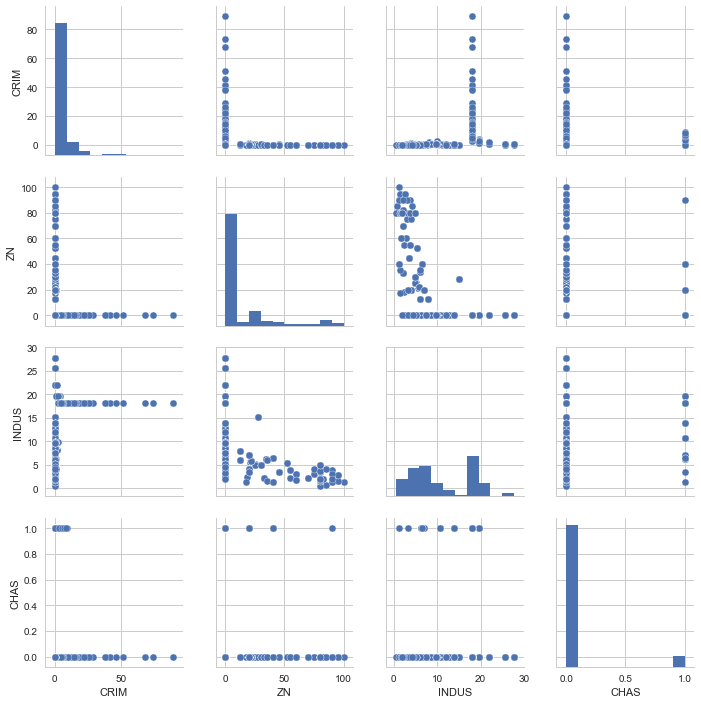

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid', context='notebook')
cols = ['CRIM', 'ZN', 'INDUS', 'CHAS']
sns.pairplot(df[cols], size=2.5);
plt.show()

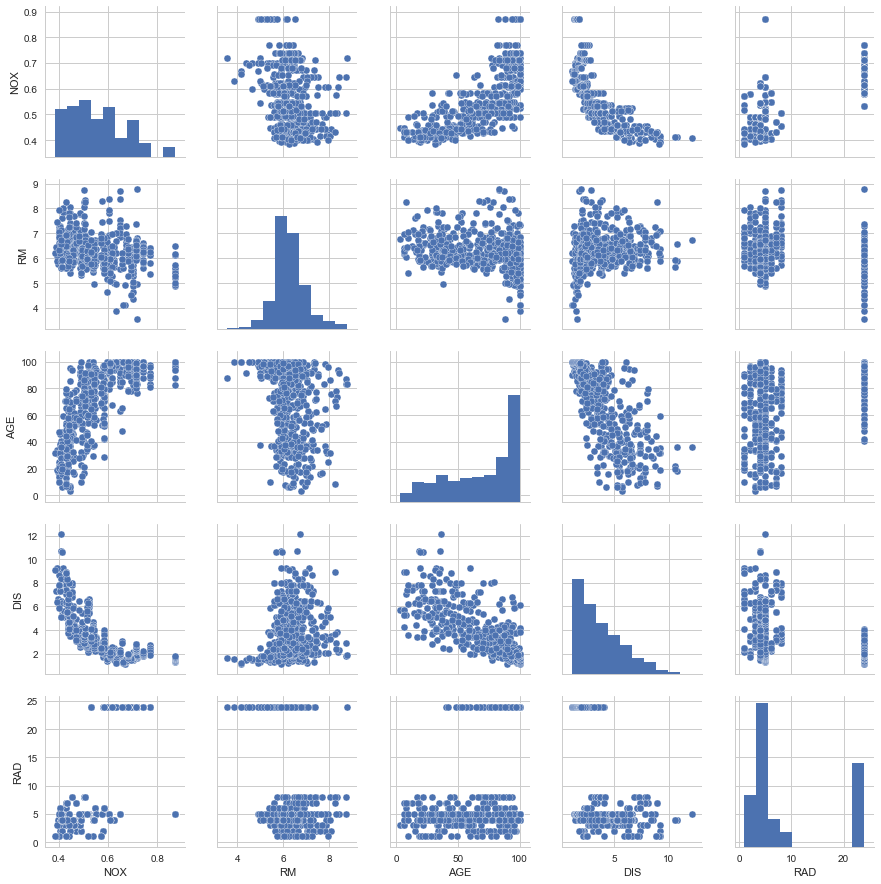

In [5]:
sns.set(style='whitegrid', context='notebook')
cols = ['NOX', 'RM', 'AGE', 'DIS', 'RAD']
sns.pairplot(df[cols], size=2.5);
plt.show()

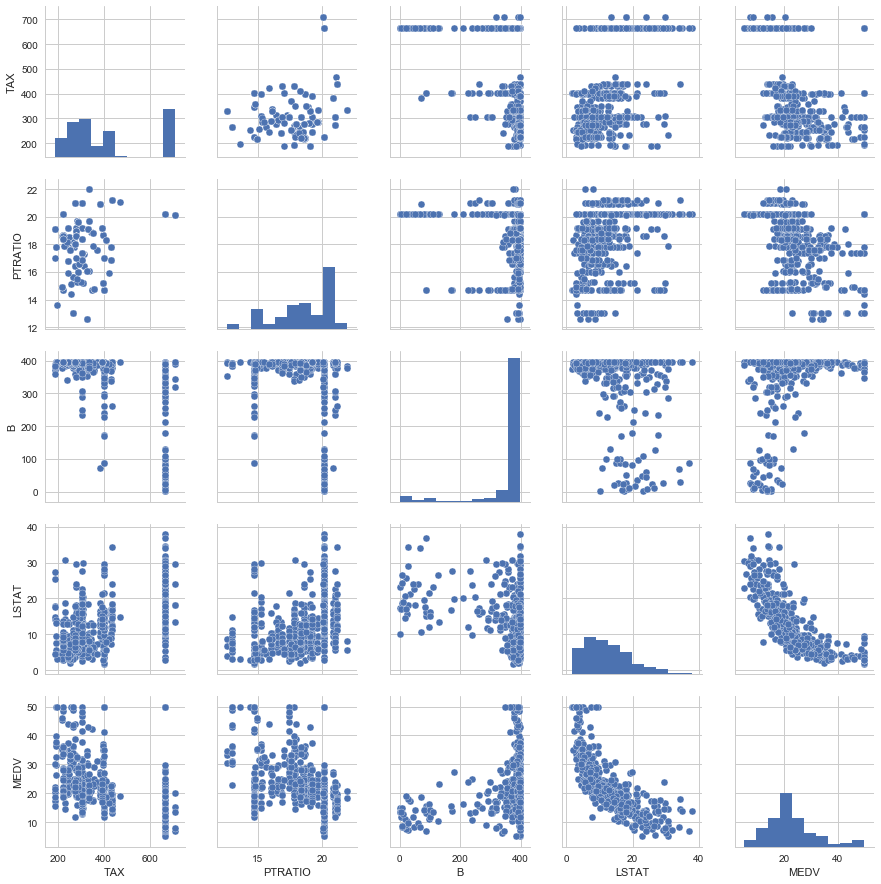

In [6]:
sns.set(style='whitegrid', context='notebook')
cols = ['TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
sns.pairplot(df[cols], size=2.5);
plt.show()

<img src="ch10_4.png" alt="Drawing" style="width: 1000px;"/>

이렇게 각각 변수들의 관계를 확인한다. 이후, 선형 관계를 계량화하기 위해 correlation을 그릴 것이다. correlation matrix는 PCA에서의 covariance matrix와 밀접하게 관련된다. 직관적으로, 우리는 correlation matrix를 covariance matrix의 rescaled version으로 해석할 수 있다. 실제로, correlation matrix는 데이터를 standardized 한 후의 covariance matrix와 동일하다.

Correlation matrix는 **Preason product-moment correlation coefficients (Pearson's r)**로 측정되며, 이는 한 쌍의 변수들 간의 linear dependence를 말한다. 상관계수는 -1부터 1의 값을 가지며, 1에 가까울수록 양의 상관관계, 0은 상관관계가 없고, -1에 가까울수록 음의 상관관계를 가진다. 

<img src="ch10_5.png" alt="Drawing" style="width: 700px;"/>

우리는 Numpy의 `corrcoef`함수를 이용해 `heatmap`을 사용할 수 있다.

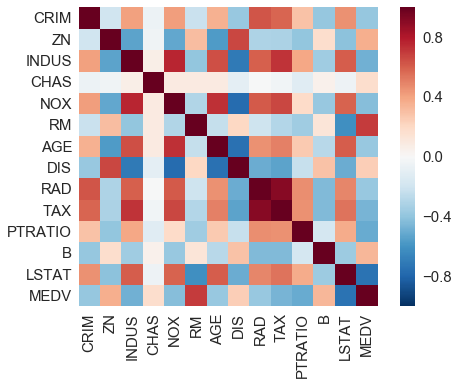

In [9]:
import numpy as np
cm = np.corrcoef(df[cols].values.T)
sns.set(font_scale=1.5)
hm = sns.heatmap(cm,
                    cbar=True,
                    square=True,
                    fmt='.2f',
                    annot_kws={'size': 15},
                    yticklabels=cols,
                    xticklabels=cols)
plt.show()


선형회귀 모델을 만드려면, 우리의 target variable인 **MEDV**와 큰 상관관계를 가진 변수들에 관심을 가져야 한다. 히트맵에서 확인할 수 있듯, 이는 **LSTAT**변수와 큰 상관성을 가진다(-0.74). **RM**또한 큰 상관성(0.7)을 가지며, 이는 우리가 scatterplot에서 확인했던 바와 비슷하다. 이제부터는 **RM**변수를 통해 선형회귀 모델을 다룰 것이다.

## Implementing an ordinary least squares linear regression model

### Solving regression for regression parameters with gradient descent

ch2에서 Gradient Descent와 Stochastic Gradient Descent에서 쓰인 **Sum of Squared Errors(SSE)**와 OLS의 비용함수는 동일하다.

<img src="ch10_6.png" alt="Drawing" style="width: 400px;"/>

`LinearRegressionGD`를 쓰기 위해, 우리는 RM(number of rooms)변수를 독립변수로 설정해 MEDV(housing price)를 예측 할 것이다. 또한, 우리는 변수들을 표준화해 좀 더 빨리 convergence에 접근 할 것이다.

In [84]:
class LinearRegressionGD(object):
    def __init__(self, eta=0.001, n_iter=20):
        self.eta = eta
        self.n_iter = n_iter
    def fit(self, X, y):
        self.w_ = np.zeros(1 + X.shape[1])
        self.cost_ = []
        for i in range(self.n_iter):
            output = self.net_input(X)
            errors = (y - output)
            self.w_[1:] += self.eta * X.T.dot(errors)
            self.w_[0] += self.eta * errors.sum()
            cost = (errors**2).sum() / 2.0
            self.cost_.append(cost)
        return self
    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]
    def predict(self, X):
        return self.net_input(X)

다음 그래프는 cost가 어떻게 줄어드는지 보여준다.

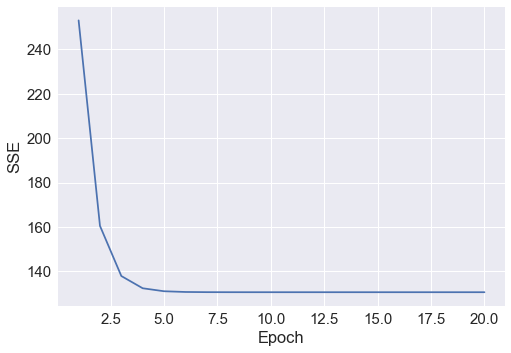

In [69]:
plt.plot(range(1, lr.n_iter+1), lr.cost_)
plt.ylabel('SSE')
plt.xlabel('Epoch')
plt.show()

In [70]:
def lin_regplot(X, y, model):
    plt.scatter(X, y, c='blue')

    plt.plot(X, model.predict(X), color='red')

    return None

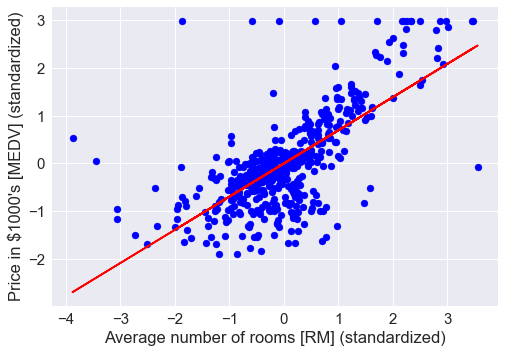

In [71]:
lin_regplot(X_std, y_std, lr)
plt.xlabel('Average number of rooms [RM] (standardized)')
plt.ylabel('Price in $1000\'s [MEDV] (standardized)')
plt.show()

이러한 관찰은 직관적으로 이해가 가지만, 이 데이터는 항상 많은 방이 높은 집값을 보증하지는 않는다는 것 또한 드러낸다. 흥미롭게도, y = 3일때 우리는 방 수에 상관 없이 높은 집값을 유지하는 것을 볼 수 있다. 실제 적용에서는 이 변수들을 원래의 스케일로 돌려주는 것 또한 필요하다. 예측된 가격을 다시 되돌리려면 `StandardScaler`의 `inverse_transform`메소드를 사용하면 된다.

In [87]:
num_rooms_std = sc_x.transform([5.0])
price_std = lr.predict(num_rooms_std)
print("Price in $1000's: %.3f" % \
    sc_y.inverse_transform(price_std))

Price in $1000's: 10.840


/Users/WooJin/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/data.py:649: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)


우리가 만일 표준화된 변수들의 weight를 업데이트 한다면, y intercept는 항상 0이 되어 업데이트 할 필요가 없다.

In [89]:
print('Slope: %.3f' % lr.w_[1])
print('Intercept: %.3f' % lr.w_[0])

Slope: 0.695
Intercept: -0.000


# Estimating the coefficient of a regression model via scikit-learn

실제 우리가 회귀분석을 사용할 때에는 라이브러리를 쓰게 된다. scikit-learn의 `LinearRegression`오브젝트는 **LIBLINERAR**라이브러리를 사용해 더 향상된 최적화 알고리즘을 가지고 있다. 

In [91]:
from sklearn.linear_model import LinearRegression
slr = LinearRegression()
slr.fit(X, y)
print('Slope: %.3f' % slr.coef_[0])
print('Intercept: %.3f' % slr.intercept_)

Slope: 9.102
Intercept: -34.671


위 코드에서 볼 수 있듯, 표준화 되지 않은 RM과 MEDV 변수는 다른 coefficient를 가진다. 이를 우리가 짠 GD implementation과 비교해 보자. (거의 비슷함)

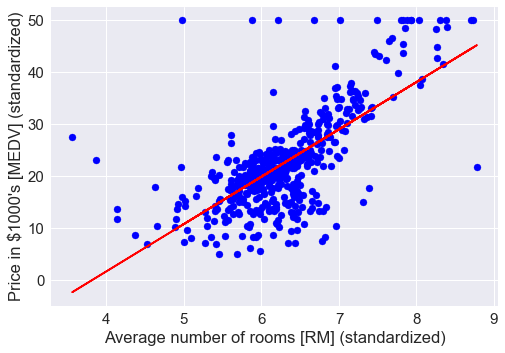

In [92]:
lin_regplot(X, y, slr)
plt.xlabel('Average number of rooms [RM] (standardized)')
plt.ylabel('Price in $1000\'s [MEDV] (standardized)')
plt.show()

## Fitting a robust regression model using RANSAC

선형회귀 모델은 outlier들에 의해 크게 영향받을 수 있다. 즉, 작은 수의 outlier들이 우리 모델의 coefficient에 큰 영향을 줄 수 있다. 하지만, outlier를 제거하는것은 우리의 판단과 domain knowledge를 요구한다. 

다른 방식으로는, **RANdom SAmple Consensus(RANSAC)**알고리즘을 사용할 수 있다. 이는 소위 inliers를 사용해 회귀모델을 학습시킨다. 그 알고리즘은 다음과 같이 요약된다.

- inliers들의 숫자를 정한다.
- 다른 데이터들을 모두 사용해 inlier들만 사용한 모델과 비교하고, inlier를 추가한다.
- 다시 학습시킨다.
- 다시 원래의 모델(모든 데이터 이용)과 비교한다.
- 위 과정이 유저가 정한 성능 기준을 넘을때까지 수행한다.

In [119]:
from sklearn.linear_model import RANSACRegressor
ransac = RANSACRegressor(LinearRegression(),

                            max_trials=100,

                            min_samples=50,

                            residual_metric=lambda x: np.sum(np.abs(x), axis=1),

                            residual_threshold=10.0, # inlier set과의 거리가 5이하

                            random_state=0)

ransac.fit(X, y)

/Users/WooJin/anaconda/lib/python3.6/site-packages/sklearn/linear_model/ransac.py:261: DeprecationWarning: 'residual_metric' was deprecated in version 0.18 and will be removed in version 0.20. Use 'loss' instead.
  DeprecationWarning)


RANSACRegressor(base_estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False),
        is_data_valid=None, is_model_valid=None, loss='absolute_loss',
        max_trials=100, min_samples=50, random_state=0,
        residual_metric=<function <lambda> at 0x1275c8b70>,
        residual_threshold=10.0, stop_n_inliers=inf, stop_probability=0.99,
        stop_score=inf)

기본적으로, scikit-learn은 inlier threshold를 정하기 위해 target value y의 **Median Absolute Deviation**을 사용한다. 하지만, inlier threshold를 정하는것은 보통 문제마다 다르며, 이는 RANSAC의 단점이다. 

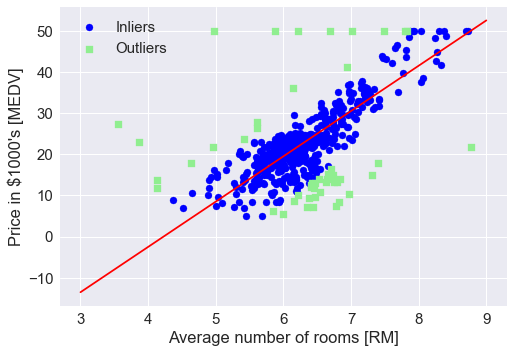

In [120]:
inlier_mask = ransac.inlier_mask_
outlier_mask = np.logical_not(inlier_mask)

line_X = np.arange(3, 10, 1)
line_y_ransac = ransac.predict(line_X[:, np.newaxis])
plt.scatter(X[inlier_mask], y[inlier_mask],
                    c='blue', marker='o', label='Inliers')

plt.scatter(X[outlier_mask], y[outlier_mask],
                c='lightgreen', marker='s', label='Outliers')

plt.plot(line_X, line_y_ransac, color='red')
plt.xlabel('Average number of rooms [RM]')
plt.ylabel('Price in $1000\'s [MEDV]')
plt.legend(loc='upper left')
plt.show()

In [121]:
print('Slope: %.3f' % ransac.estimator_.coef_[0])
print('Intercept: %.3f' % ransac.estimator_.intercept_)

Slope: 11.026
Intercept: -46.621


원래의 기울기와 약간 달라진 것을 볼 수 있다.

In [96]:
print('Slope: %.3f' % slr.coef_[0])
print('Intercept: %.3f' % slr.intercept_)

Slope: 9.102
Intercept: -34.671


RANSAC을 이용해 우리는 outlier들의 impact를 제거해 주었다. 하지만 우리는 이 방법이 우리의 예측 성능에 얼마나 큰 기여를 했는지 알지 못한다. 

## Evaluating the performance of linear regression models

챕터6에서 기억하듯, 우리는 데이터를 훈련/테스트셋으로 나눠 훈련시킨 후 평가했다. 이번에는 다변수 회귀를 사용할 것이다.

In [97]:
from sklearn.cross_validation import train_test_split
X = df.iloc[:, :-1].values
y = df['MEDV'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
slr = LinearRegression()
slr.fit(X_train, y_train)
y_train_pred = slr.predict(X_train)
y_test_pred = slr.predict(X_test)

/Users/WooJin/anaconda/lib/python3.6/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


다변수이기 때문에 이차원 공간에 그릴 수는 없지만, 우리는 각각의 **residual plots**를 그려 볼 수는 있다. 이는 회귀모델의 nonlinearity와 outlier를 감지하고, error가 랜덤하게 분포되었는지 확인하기 위해 사용한다.

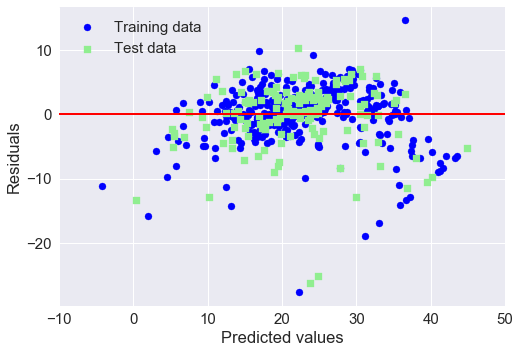

In [98]:
plt.scatter(y_train_pred, y_train_pred - y_train, c='blue', marker='o', label='Training data')
plt.scatter(y_test_pred, y_test_pred - y_test, c='lightgreen', marker='s', label='Test data')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=-10, xmax=50, lw=2, color='red')
plt.xlim([-10, 50])
plt.show()

만약 완벽한 예측을 했다면, residual은 거의 0에 가깝게 될 것이다. 하지만 좋은 회귀 모델은 error가 저 빨간 선 주위로 랜덤하게 분포되어 있다. 우리가 이 residual plot에서 패턴을 찾아 낸다면, 이는 우리의 모델이 독립변수의 정보를 부분적으로 설명하지 못한다는 것이다. 더해서, 우리는 outlier들을 찾아내는 데에도 이를 사용할 수 있다. 이는 저 밑부분의 샘플들에 해당한다. 

다른 모델 평가 방법은 **Mean Squared Error(MSE)**로써, 이는 SSE 비용 함수의 평균값이다. 이는 다른 회귀 모델들을 비교할때나, parameter tunining을 하기 위해 쓰인다.

<img src="ch10_7.png" alt="Drawing" style="width: 400px;"/>

In [99]:
from sklearn.metrics import mean_squared_error

print('MSE train: %.3f, test: %.3f' % (
            mean_squared_error(y_train, y_train_pred),
            mean_squared_error(y_test, y_test_pred)))

MSE train: 19.958, test: 27.196


위 숫자는 우리가 training set에 overfitting 되어 있음을 의미한다. 가끔은, coefficient of determination(R^2)를 쓰는 것도 유용하다. 이는 표준화된 버전의 MSE라고 볼 수 있다. 이는 다음과 같이 정의된다.

<img src="ch10_8.png" alt="Drawing" style="width: 250px;"/>

여기서, SSE는 sum of squared error이고 SST는 total sum of squares이다. 

<img src="ch10_9.png" alt="Drawing" style="width: 400px;"/>

트레이닝 데이터셋에서, R^2는 0에서 1사이 값을 가지나 테스트셋에서는 음수를 가질수도 있다. 만약 1이라면 이는 완전하게 fit했다는 것을 의미한다. 

In [100]:
from sklearn.metrics import r2_score
print('R^2 train: %.3f, test: %.3f' %
          (r2_score(y_train, y_train_pred),
            r2_score(y_test, y_test_pred)))

R^2 train: 0.765, test: 0.673


## Using regularized methods for regression

회귀 모델에서 가장 인기있는 방법들은 **Ridge Regression, Least Absolute Shrinkage and Selection Operator(LASSO)** 그리고 **Elastic Net**방법이 있다. Ridge regression은 L2 penalized model이다.

<img src="ch10_10.png" alt="Drawing" style="width: 600px;"/>

hyperparameter λ 의 크기를 늘림으로써 weight를 약하게 할 수 있다. 여기서 intercept term w_0는 regularize 하지 않는다. 

다른 방법은 LASSO인데, 이는 L1을 사용한다. 이는 특정 weights를 0으로 만들수 있어, supervised feature selection technique으로도 유용하다. 

<img src="ch10_11.png" alt="Drawing" style="width: 600px;"/>

하지만, LASSO의 한계는 만약 m>n이라면 최대 n개의 변수를 뽑을 수 있다는 것이다. LASSO와 Ridge regression사이의 타협접이 바로 Elastic Net이다. 

<img src="ch10_12.png" alt="Drawing" style="width: 600px;"/>

이는 모두 scikit-learn에서 사용 가능하며, regularization strength를 명시해 주어야 한다는 것을 제외하면 보통의 회귀 모델과 비슷하게 사용할 수 있다.

In [101]:
from sklearn.linear_model import Ridge
ridge = Ridge(alpha=1.0)

In [102]:
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=1.0)

In [122]:
from sklearn.linear_model import ElasticNet
lasso = ElasticNet(alpha=1.0, l1_ratio=0.5)

ElasticNet에서의 11_ratio를 1.0으로 설정한다면, 이는 LASSO와 동일해진다. 